In [2]:
def eval_legendre(n, x):
    p = [0] * (n + 1)
    p[0] = 1
    if n > 0:
        p[1] = x
    for k in range(1, n):
        p[k + 1] = ((2 * k + 1) * x * p[k] - k * p[k - 1]) / (k + 1)
    return p


In [3]:
from scipy.integrate import quad

# Subroutine to evaluate the coefficient a_j
def coefficient_aj(f, phi_j, w, a, b):
    # Define the function handle for phi_j(x) * f(x) * w(x)
    func_j = lambda x: phi_j(x) * f(x) * w(x)
    # Compute the integral using quad
    numerator, _ = quad(func_j, a, b)
    
    # Define the function handle for phi_j^2(x) * w(x)
    phi_j_sq = lambda x: (phi_j(x) ** 2) * w(x)
    # Compute the normalization factor using quad
    denominator, _ = quad(phi_j_sq, a, b)
    
    # Return the coefficient a_j
    return numerator / denominator


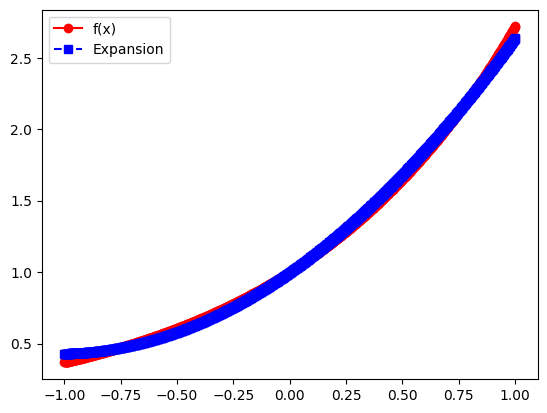

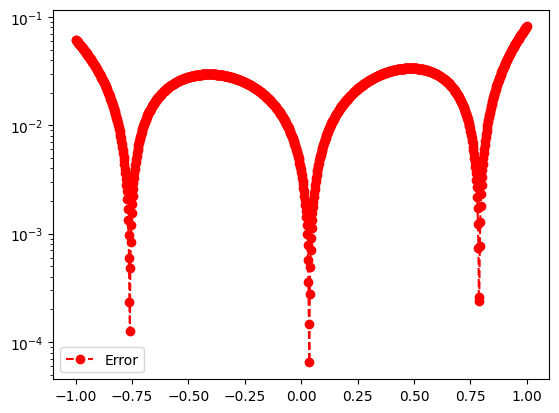

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad

# Function to evaluate Legendre expansion
def eval_legendre_expansion(f, a, b, w, n, x):
    # Evaluate all Legendre polynomials at x
    p = eval_legendre(n, x)

    # Initialize the sum to 0
    pval = 0.0

    # Loop over each polynomial
    for j in range(n + 1):
        # Create function handle for phi_j(x)
        phi_j = lambda x: eval_legendre(j, x)[j]

        # Compute the coefficient a_j using the subroutine
        aj = coefficient_aj(f, phi_j, w, a, b)

        # Accumulate into pval
        pval += aj * p[j]

    return pval

# Main driver function
def driver():
    # Function to approximate
    f = lambda x: math.exp(x)

    # Interval of interest
    a, b = -1, 1

    # Weight function
    w = lambda x: 1.0

    # Order of approximation
    n = 2

    # Number of points to sample
    N = 1000
    xeval = np.linspace(a, b, N + 1)
    pval = np.zeros(N + 1)

    # Evaluate the Legendre expansion at each point
    for kk in range(N + 1):
        pval[kk] = eval_legendre_expansion(f, a, b, w, n, xeval[kk])

    # Exact values of the function
    fex = np.array([f(x) for x in xeval])

    # Plot the function and the expansion
    plt.figure()
    plt.plot(xeval, fex, 'ro-', label='f(x)')
    plt.plot(xeval, pval, 'bs--', label='Expansion')
    plt.legend()
    plt.show()

    # Plot the error on a semi-log scale
    err = np.abs(pval - fex)
    plt.semilogy(xeval, err, 'ro--', label='Error')
    plt.legend()
    plt.show()

# Run the driver function
if __name__ == '__main__':
    driver()


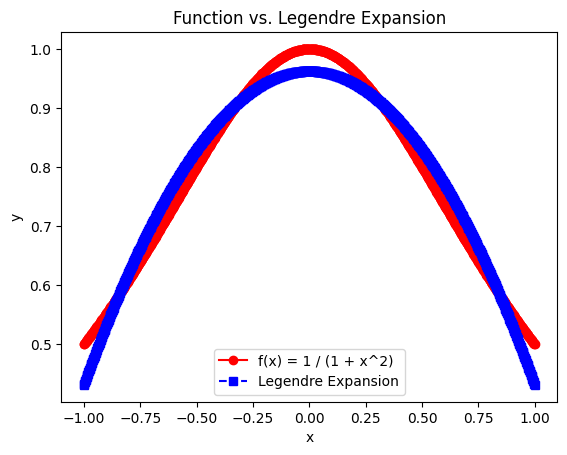

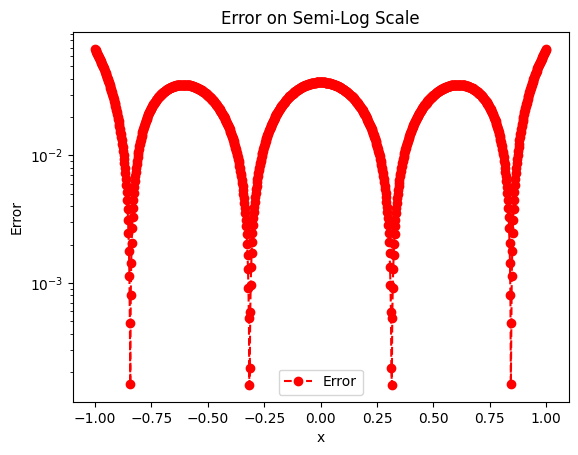

In [7]:
def driver():
    # New function to approximate
    f = lambda x: 1 / (1 + x**2)  # Updated function

    # Interval of interest
    a, b = -1, 1

    # Weight function
    w = lambda x: 1.0

    # Order of approximation
    n = 2

    # Number of points to sample
    N = 1000
    xeval = np.linspace(a, b, N + 1)
    pval = np.zeros(N + 1)

    # Evaluate the Legendre expansion at each point
    for kk in range(N + 1):
        pval[kk] = eval_legendre_expansion(f, a, b, w, n, xeval[kk])

    # Exact values of the function
    fex = np.array([f(x) for x in xeval])

    # Plot the function and the expansion
    plt.figure()
    plt.plot(xeval, fex, 'ro-', label='f(x) = 1 / (1 + x^2)')
    plt.plot(xeval, pval, 'bs--', label='Legendre Expansion')
    plt.legend()
    plt.title("Function vs. Legendre Expansion")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    # Plot the error on a semi-log scale
    err = np.abs(pval - fex)
    plt.figure()
    plt.semilogy(xeval, err, 'ro--', label='Error')
    plt.legend()
    plt.title("Error on Semi-Log Scale")
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.show()
if __name__ == '__main__':
    driver()

In [12]:
def eval_chebyshev(n, x):
    t = [0] * (n + 1)
    t[0] = 1
    if n > 0:
        t[1] = x
    for k in range(1, n):
        t[k + 1] = 2 * x * t[k] - t[k - 1]
    return t


In [13]:
def eval_chebyshev_expansion(f, a, b, n, x):
    # Evaluate all Chebyshev polynomials at x
    t = eval_chebyshev(n, x)

    # Initialize the sum to 0
    pval = 0.0

    # Loop over each polynomial
    for j in range(n + 1):
        # Create function handle for T_j(x)
        T_j = lambda x: eval_chebyshev(j, x)[j]

        # Weight function for Chebyshev polynomials
        w = lambda x: 1 / np.sqrt(1 - x**2)

        # Compute the coefficient a_j using the subroutine
        aj = coefficient_aj(f, T_j, w, a, b)

        # Accumulate into pval
        pval += aj * t[j]

    return pval


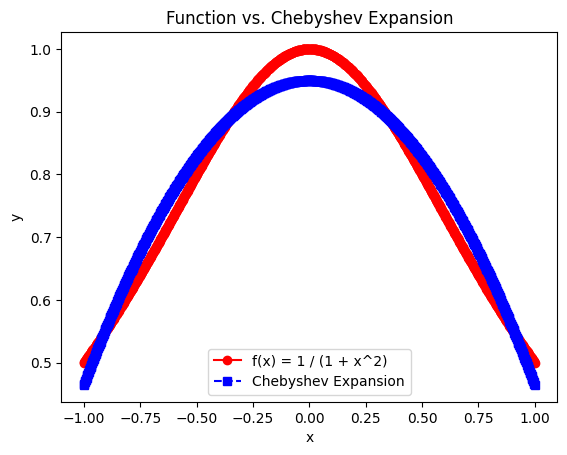

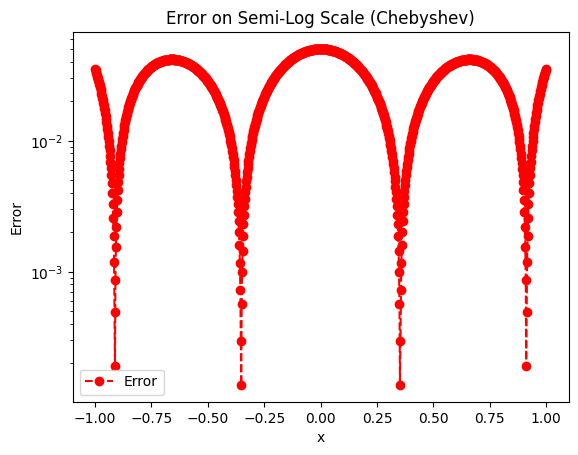

In [14]:
def driver_chebyshev():
    # Function to approximate
    f = lambda x: 1 / (1 + x**2)

    # Interval of interest
    a, b = -1, 1

    # Order of approximation
    n = 2

    # Number of points to sample
    N = 1000
    xeval = np.linspace(a, b, N + 1)
    pval = np.zeros(N + 1)

    # Evaluate the Chebyshev expansion at each point
    for kk in range(N + 1):
        pval[kk] = eval_chebyshev_expansion(f, a, b, n, xeval[kk])

    # Exact values of the function
    fex = np.array([f(x) for x in xeval])

    # Plot the function and the expansion
    plt.figure()
    plt.plot(xeval, fex, 'ro-', label='f(x) = 1 / (1 + x^2)')
    plt.plot(xeval, pval, 'bs--', label='Chebyshev Expansion')
    plt.legend()
    plt.title("Function vs. Chebyshev Expansion")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    # Plot the error on a semi-log scale
    err = np.abs(pval - fex)
    plt.figure()
    plt.semilogy(xeval, err, 'ro--', label='Error')
    plt.legend()
    plt.title("Error on Semi-Log Scale (Chebyshev)")
    plt.xlabel("x")
    plt.ylabel("Error")
    plt.show()

# Run the driver function
if __name__ == '__main__':
    driver_chebyshev()
